# import

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.multiclass import type_of_target
import tensorflow as tf
from numpy import unique
from numpy import reshape
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier  # Use scikeras for scikit-learn compatibility
from math import floor
from bayes_opt import BayesianOptimization
from tensorflow.keras.layers import LeakyReLU  # Use tensorflow.keras instead of keras
LeakyReLU = LeakyReLU(negative_slope=0.1)
import warnings

In [14]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [16]:
path = r'\Users\grego\OneDrive\Desktop\Transfer Files\Career Foundry\Specialization\Task 2'

In [18]:
df_pleasant = pd.read_csv(os.path.join(path,'Project ClimateWins - Task 2','Original Data','pleasant_data.csv'))

In [20]:
df_weather = pd.read_csv(os.path.join(path,'Project ClimateWins - Task 2','Original Data','weather_data_original.csv'))

# work

In [23]:
df_pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
df_temp = df_pleasant

In [29]:
df_temp['DATE'] = df_pleasant['DATE'].astype(str)

In [31]:
# Sample DataFrame
df_temp = pd.DataFrame(df_temp)

# Removing the last two digits and creating a new column
df_temp['MONTH'] = df_temp['DATE'].str[4:-2]

print(df_temp)

           DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0     

In [33]:
df_temp = pd.DataFrame(df_temp)

# Removing the last two digits and creating a new column
df_temp['YEAR'] = df_temp['DATE'].str[:-4]

print(df_temp)

           DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0     

In [37]:
df_temp.columns

Index(['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather', 'MONTH', 'YEAR'],
      dtype='object')

In [41]:
df_temp = df_temp.groupby('YEAR')[[
    'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
    'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
    'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
    'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
    'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
    'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
    'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
    'VALENTIA_pleasant_weather'
]].mean().reset_index()

df_temp

,YEAR,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,1960,0.232240,0.325137,0.284153,0.120219,0.163934,0.166667,0.155738,0.232240,0.150273,0.426230,0.153005,0.114754,0.0,0.158470,0.068306
1,1961,0.293151,0.413699,0.402740,0.153425,0.200000,0.230137,0.191781,0.326027,0.164384,0.452055,0.232877,0.161644,0.0,0.109589,0.046575
2,1962,0.271233,0.361644,0.326027,0.109589,0.186301,0.167123,0.145205,0.268493,0.126027,0.446575,0.191781,0.073973,0.0,0.057534,0.046575
3,1963,0.227397,0.386301,0.312329,0.128767,0.180822,0.164384,0.194521,0.265753,0.164384,0.449315,0.194521,0.126027,0.0,0.145205,0.035616
4,1964,0.295082,0.341530,0.306011,0.161202,0.245902,0.248634,0.245902,0.289617,0.226776,0.418033,0.210383,0.114754,0.0,0.161202,0.054645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2018,0.347945,0.424658,0.410959,0.312329,0.306849,0.331507,0.000000,0.317808,0.331507,0.416438,0.317808,0.219178,0.0,0.282192,0.000000
59,2019,0.290411,0.364384,0.397260,0.238356,0.268493,0.257534,0.000000,0.290411,0.249315,0.520548,0.271233,0.123288,0.0,0.194521,0.000000
60,2020,0.316940,0.344262,0.355191,0.229508,0.265027,0.275956,0.000000,0.330601,0.259563,0.456284,0.273224,0.166667,0.0,0.210383,0.000000
61,2021,0.232877,0.361644,0.000000,0.197260,0.200000,0.205479,0.000000,0.298630,0.205479,0.449315,0.200000,0.164384,0.0,0.191781,0.000000


In [58]:
df_temp['YEAR'] = df_temp['YEAR'].astype(int)

In [60]:
df_temp['DECADE'] = (df_temp['YEAR'] // 10) * 10

# Group by the 'DECADE' and calculate the mean for other columns
df_decade_avg = df_temp.groupby('DECADE').mean().reset_index()

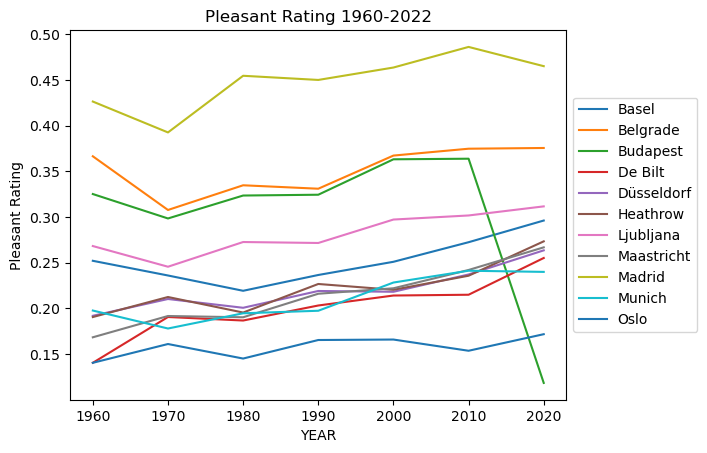

In [78]:

# Plotting the data
plt.plot(df_decade_avg['DECADE'], df_decade_avg['BASEL_pleasant_weather'], label='Basel')
plt.plot(df_decade_avg['DECADE'], df_decade_avg['BELGRADE_pleasant_weather'], label='Belgrade')
plt.plot(df_decade_avg['DECADE'], df_decade_avg['BUDAPEST_pleasant_weather'], label='Budapest')
plt.plot(df_decade_avg['DECADE'], df_decade_avg['DEBILT_pleasant_weather'], label='De Bilt')
plt.plot(df_decade_avg['DECADE'], df_decade_avg['DUSSELDORF_pleasant_weather'], label='Düsseldorf')
plt.plot(df_decade_avg['DECADE'], df_decade_avg['HEATHROW_pleasant_weather'], label='Heathrow')
plt.plot(df_decade_avg['DECADE'], df_decade_avg['LJUBLJANA_pleasant_weather'], label='Ljubljana')
plt.plot(df_decade_avg['DECADE'], df_decade_avg['MAASTRICHT_pleasant_weather'], label='Maastricht')
plt.plot(df_decade_avg['DECADE'], df_decade_avg['MADRID_pleasant_weather'], label='Madrid')
plt.plot(df_decade_avg['DECADE'], df_decade_avg['MUNCHENB_pleasant_weather'], label='Munich')
plt.plot(df_decade_avg['DECADE'], df_decade_avg['OSLO_pleasant_weather'], label='Oslo')

# Adding labels and title
plt.xlabel('YEAR')
plt.ylabel('Pleasant Rating')
plt.title('Pleasant Rating 1960-2022')

# Adding a legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()